# Assignment 1 in Deep Learning Course

In this assignment we chose to use [CIFAR 100 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

In [59]:
from keras.datasets import cifar100
import pandas as pd
import numpy as np
import operator
from sklearn.model_selection import KFold
from u_functions import showplot , plot_multiple_imgs
%matplotlib inline

ImportError: cannot import name 'plot_multiple_imgs' from 'u_functions' (/Users/erans/Documents/Studies/4th year/deep learning/Assignment 1/u_functions.py)

In [58]:
CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [35]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

## Q1 

### a.What is the size of the data ?

In [10]:
#train
len(x_train)

50000

In [11]:
#test
len(x_test)

10000

`Size of data is : 50000 samples in train and 10000 in test.`

### b.What data does each sample contain? (dimensions, channels, how many classes ) ? 

In [13]:
#sample shape 
dim = x_train[0].shape
print(dim)
# number of classes in our data set
classes_num = len(set.union(*map(set,y_train)))
print(classes_num)


(32, 32, 3)
100


`There are 100 different classes in the dataset, the dimension for each sample is 32 x 32 and there are 3 channels (RGB)`

### Should we preprocess the data? Or is it ready for use?


`We should not preprocess the data as it already ready to use.`


## Can we use augmentation and what kind of augmentation would be valid?

https://github.com/moritzhambach/Image-Augmentation-in-Keras-CIFAR-10- 

### c.Is the data balanced? (How many examples there are per class?)



In [91]:
classes_count_map = {}
for item in y_train:
    if item[0] in classes_count_map:
        classes_count_map[item[0]] = classes_count_map[item[0]] + 1
    else:
        classes_count_map[item[0]] = 1

In [92]:
classes_count_map = sorted(classes_count_map.items(), key=operator.itemgetter(0))
classes_count_map

[(0, 500),
 (1, 500),
 (2, 500),
 (3, 500),
 (4, 500),
 (5, 500),
 (6, 500),
 (7, 500),
 (8, 500),
 (9, 500),
 (10, 500),
 (11, 500),
 (12, 500),
 (13, 500),
 (14, 500),
 (15, 500),
 (16, 500),
 (17, 500),
 (18, 500),
 (19, 500),
 (20, 500),
 (21, 500),
 (22, 500),
 (23, 500),
 (24, 500),
 (25, 500),
 (26, 500),
 (27, 500),
 (28, 500),
 (29, 500),
 (30, 500),
 (31, 500),
 (32, 500),
 (33, 500),
 (34, 500),
 (35, 500),
 (36, 500),
 (37, 500),
 (38, 500),
 (39, 500),
 (40, 500),
 (41, 500),
 (42, 500),
 (43, 500),
 (44, 500),
 (45, 500),
 (46, 500),
 (47, 500),
 (48, 500),
 (49, 500),
 (50, 500),
 (51, 500),
 (52, 500),
 (53, 500),
 (54, 500),
 (55, 500),
 (56, 500),
 (57, 500),
 (58, 500),
 (59, 500),
 (60, 500),
 (61, 500),
 (62, 500),
 (63, 500),
 (64, 500),
 (65, 500),
 (66, 500),
 (67, 500),
 (68, 500),
 (69, 500),
 (70, 500),
 (71, 500),
 (72, 500),
 (73, 500),
 (74, 500),
 (75, 500),
 (76, 500),
 (77, 500),
 (78, 500),
 (79, 500),
 (80, 500),
 (81, 500),
 (82, 500),
 (83, 500),
 (

`As we showed in the last print - every class has 500 samples in the trainset`

### d.Are there any benchmark results for different methods used on this data?

### e.Show some samples from each label (if there are many categories try and present examples of easily separable ones vs. harder more similar categories)

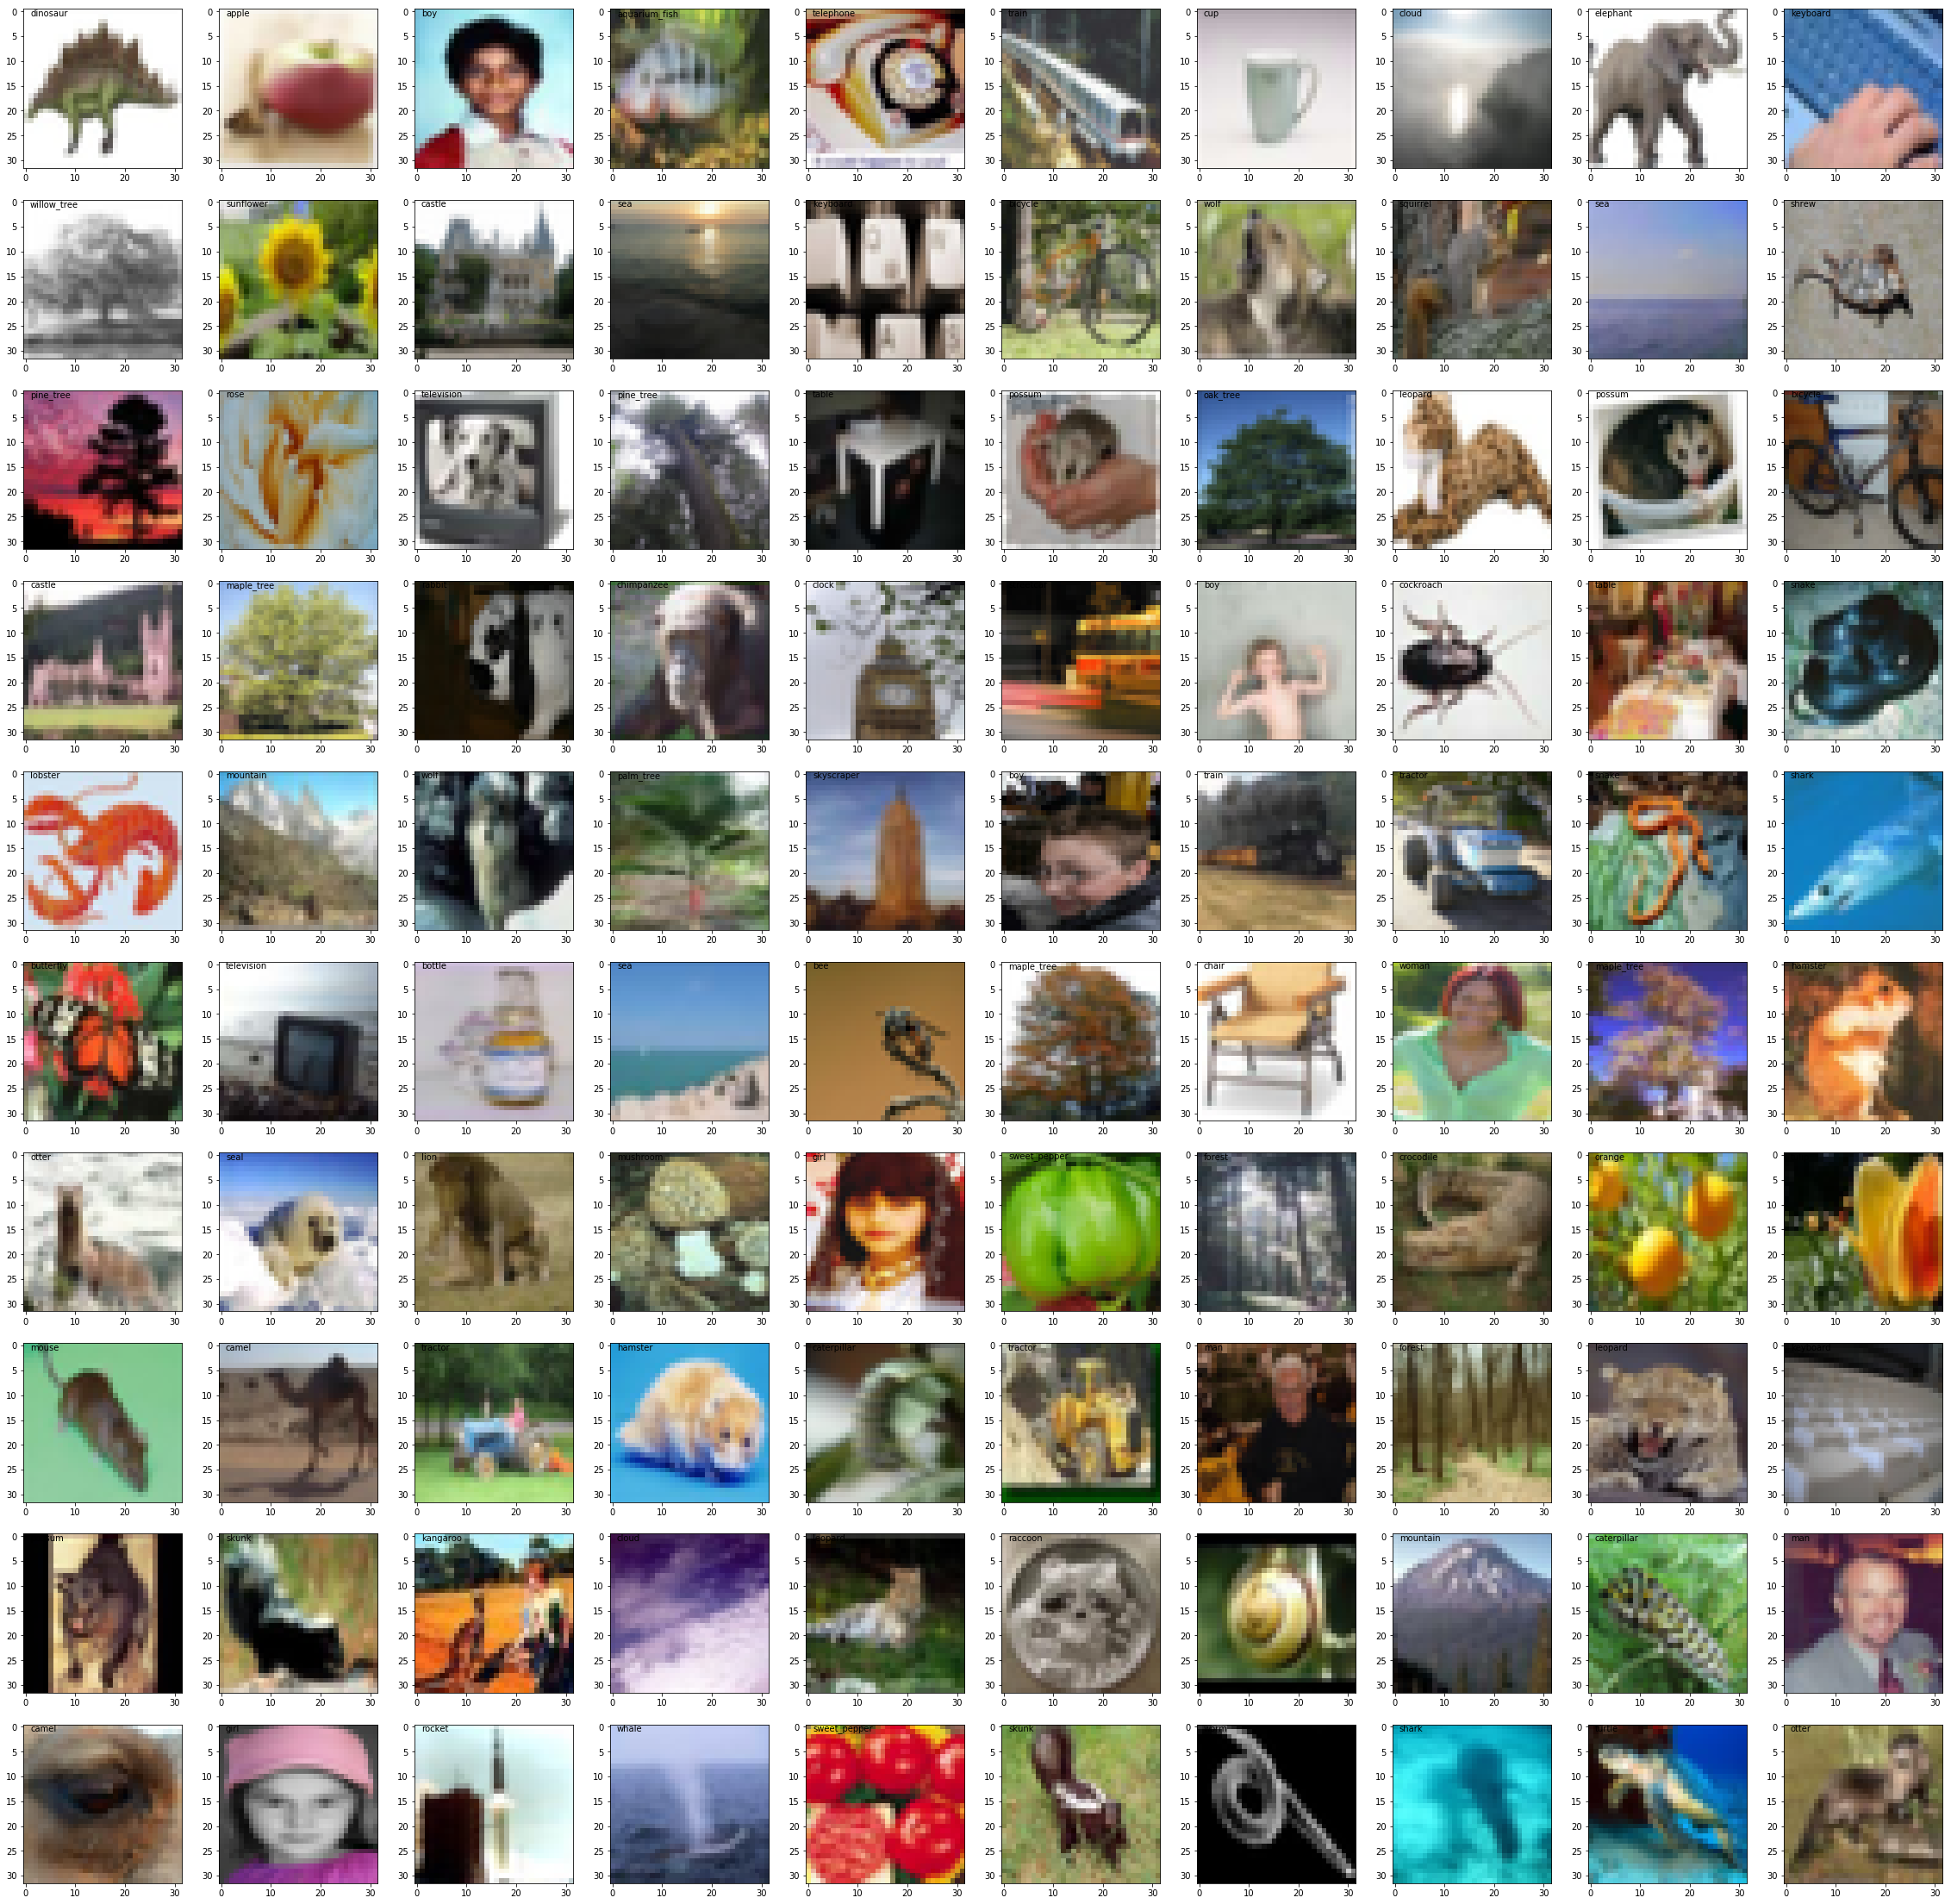

In [32]:
showplot(x_train,y_train,CIFAR100_LABELS_LIST)

In [36]:
plot_multiple_imgs(x_train,y_train,10,10,(13,7),CIFAR100_LABELS_LIST)

NameError: name 'plot_multiple_imgs' is not defined

## Q2